✅ Model Comparison:
-------------------------
Logistic Regression Accuracy: 0.83
Random Forest Accuracy: 0.80

📊 Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        75
           1       0.65      0.68      0.67        25

    accuracy                           0.83       100
   macro avg       0.77      0.78      0.78       100
weighted avg       0.83      0.83      0.83       100


🌲 Random Forest Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        75
           1       0.60      0.60      0.60        25

    accuracy                           0.80       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.80      0.80      0.80       100



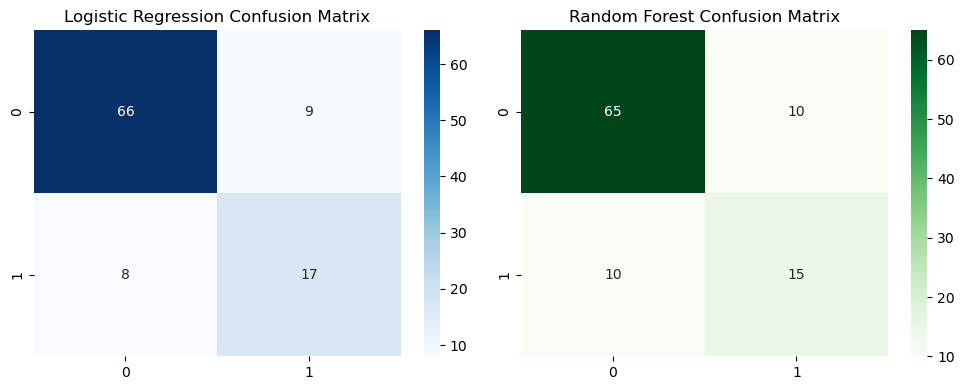

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = pd.read_csv("student_performance_dataset_cleaned.csv")

# Step 2: Prepare data
data['Pass_Fail'] = data['Pass_Fail'].map({'Pass': 1, 'Fail': 0})  # encode labels

X = data[['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores']]
y = data['Pass_Fail']

# Step 3: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Step 5: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 6: Evaluate accuracy
acc_log = accuracy_score(y_test, y_pred_log)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("✅ Model Comparison:")
print("-------------------------")
print(f"Logistic Regression Accuracy: {acc_log:.2f}")
print(f"Random Forest Accuracy: {acc_rf:.2f}")

# Step 7: Detailed Classification Report
print("\n📊 Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("\n🌲 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

# Step 8: Confusion Matrix Visualization
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()
